### KNN Algorithm Implementation with example

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\rajas\AppData\Local\Temp\ipykernel_31652\4288596355.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Import data and check info
data = pd.read_table('Fruits_Data.txt')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


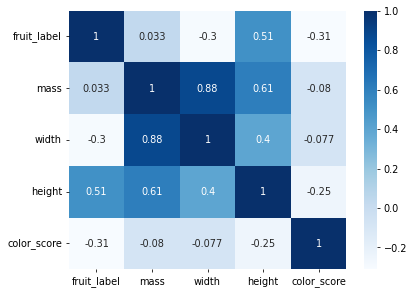

In [3]:
# Check the correlation between features
correlation = data.corr(numeric_only=True)
ax = sns.heatmap(correlation, cmap="Blues", annot=True)
ax.tick_params(axis='y', rotation=0)
ax.figure.set_dpi(70)

In [4]:
# Splitting the dataset using train_test_split sklearn
X = data[['mass', 'width', 'height']]
y = data['fruit_label']
lookup_fruit_names = dict(zip(data['fruit_label'], data['fruit_name']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2104)

In [5]:
# Train the model using .fit method
X = data[['mass', 'width', 'height']]
y = data['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=3)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
scr=knn.score(X_test,y_test)
print("Score for your model is ",scr)

Score for your model is  0.75


In [6]:
result = knn.predict([[120,6.0,8.4]])
print(lookup_fruit_names[result[0]])

lemon


c:\Users\rajas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


([<matplotlib.axis.XTick at 0x20334148e20>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

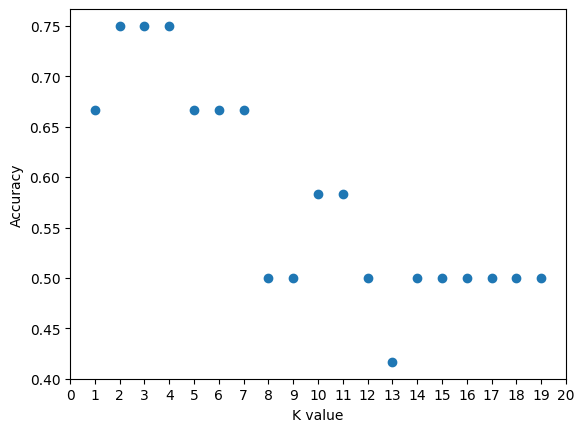

In [9]:
scores = []
k_range = range(1, 20)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

plt.figure()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])